<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Line%C3%A1ris_transzform%C3%A1ci%C3%B3k_handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bevezető

- Általában magas dimenziós adatokkal dolgozunk.
- Általában több adatunk van, mint dimenziónk. Az adatok azonban nem feltétlenül töltik ki a teljes teret.
- A dimenziószámot csökkenteni kell, így a lényegi információk maradnak meg.
- Kérdés, hogy mit jelent a lényegi információ, hogy tudjuk azt megfogalmazni?

# Nagy dimenzió "átka" I.

<img width="720" src="http://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png" />


http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

# Lineáris módszerek

- Ezen az órán lineáris transzformációkkal fogunk dolgozni.
- Lineáris: összeadás, szorzás
- Transzformáció: az összes adatpontot átvisszük egy másik rendszerbe egy koherens leképezéssel

Részletek: https://en.wikipedia.org/wiki/Linear_map

# Mátrixok

- Minden lineáris transzformáció leírható egy mátrix szorzással.

Háttéranyagok:
- https://www.statisticshowto.com/matrices-and-matrix-algebra/
- https://en.wikipedia.org/wiki/Matrix_multiplication

# Lineáris projekció

Dimenzió csökkentési céllal végezhetünk lineáris projekciót.

A fenti példán egy olyan esetet néztünk, ami a már létező tengelyekre vetíti az adatokat.
* Gyakorlatilag eldobunk egy dimenziót
* Azaz: információt veszítünk (nem túl szofisztikált módon)

A reprezentáció tanulás általában dimenziócsökkentést jelent.
* Általában több adat van, mint dimenzió
* (Ellenpélda: genom adatok - más módszereket kell keresni)

Az új reprezentáció az eredeti adatokból képződik
* Lineáris transzformációkkal fogunk kezdeni
* Olyan leképezést keresünk, ami nem feltétlenül a tengelyekre képez.
* Ez azt jelenti, hogy forgatunk is. :)
* A transzformációt mi definiáljuk, keressük meg.

A transzformáció függ a feladattól
* Ha például osztályozni szeretnénk, olyan transzformációt kell keresni, ami szeparálja a mintát.
* El is tudjuk rontani. Például az ábrán a PCA összemossa az adatokat.

![alt text](https://drive.google.com/uc?export=view&id=1WqZDTDxGSYFVps-qcgfNjIArh0J-Pojm)


# PCA

PCA = Principal component analysis

A PCA lineáris transzformáció

A reprezentáció kialakítása
* Az első dimenzió az az irány, ahol a legnagyobb a minta szórása
* A második dimenzió merőleges az első dimenzióra, ezen feltétel mellett a legnagyobb a minta szórása
... és így tovább

Szerencsére van explicit formula
* Azaz a megoldás nem iteratív
* Az új bázis bázisvektorai: kovariancia mátrix sajátvektorai.

![alt text](https://drive.google.com/uc?export=view&id=1_ahHM8593gDKbfR_IkHCgMpUWh1w5pr6)

Ha valakit kicsit mélyebben érdekel: https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

## Iris dataset

In [125]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris)
print(iris.DESCR)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [126]:
import pandas as pd
import numpy as np

df=pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### --> Feladat 2: Számoljuk ki az Iris dataset PCA bázisát

Segítség
* Mean centering (from numpy import mean)
* Dekompozíció kiszámítása (from sklearn.decomposition import PCA)

In [127]:
# Segítség a centráláshoz: print_stats metódus
from numpy import mean
from scipy.stats import describe
from sklearn.decomposition import PCA
def print_stats(df):
    d = describe(df)
    print('Observations: {}'.format(d.nobs))
    print('Min: {}'.format(d.minmax[0]))
    print('Max: {}'.format(d.minmax[1]))
    print('Mean: {}'.format(d.mean))
    print('Var : {}'.format(d.variance))
    print('Skew: {}'.format(d.skewness))
    print('Kurt: {}'.format(d.kurtosis))
print_stats(df)

Observations: 150
Min: [4.3 2.  1.  0.1 0. ]
Max: [7.9 4.4 6.9 2.5 2. ]
Mean: [5.84333333 3.05733333 3.758      1.19933333 1.        ]
Var : [0.68569351 0.18997942 3.11627785 0.58100626 0.67114094]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421  0.        ]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741 -1.5       ]


In [128]:
# Emeljük ki a feature-öket egy df_feature DataFrame-be!
print(df.columns[0:4])
#df_feature=df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
df_feature=df[df.columns[0:4]]
# Írassuk ki az első néhány sort a DataFrame.head metódus segítségével!
df_feature.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [129]:
# Írassuk ki a df_features statisztikáját a print_stats függvény segítségével!
print_stats(df_feature)

Observations: 150
Min: [4.3 2.  1.  0.1]
Max: [7.9 4.4 6.9 2.5]
Mean: [5.84333333 3.05733333 3.758      1.19933333]
Var : [0.68569351 0.18997942 3.11627785 0.58100626]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741]


### Mean centering

Az adatokat centrálni kell.

<img width="720" src="https://i.stack.imgur.com/9vENg.jpg" />

Forrás: https://stats.stackexchange.com/questions/22329/how-does-centering-the-data-get-rid-of-the-intercept-in-regression-and-pca


In [130]:
# Mean centering
# A numpy csomagból importáljuk be a mean metódust!
from numpy import mean
# Számoljuk ki a mean metódus segítségével a változók átlagát egy M dataframebe!
# Segítség: https://scikit-learn.org/stable/modules/preprocessing.html
m=mean(df_feature)
# Írassuk ki M-et!
type(m)
print(m)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [131]:
# Centráljuk az eredeti adatokat (kivonás) a dfc nevű dataframe-be!
dfc=df_feature-m
#dfc=df_feature-[m[0],m[1],m[2],m[3]]
# Írassuk ki a dfc statisztikáját
print_stats(dfc)

Observations: 150
Min: [-1.54333333 -1.05733333 -2.758      -1.09933333]
Max: [2.05666667 1.34266667 3.142      1.30066667]
Mean: [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
Var : [0.68569351 0.18997942 3.11627785 0.58100626]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741]


Observations: 150
Min: [-1.54333333 -1.05733333 -2.758      -1.09933333]
Max: [2.05666667 1.34266667 3.142      1.30066667]
Mean: [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
Var : [0.68569351 0.18997942 3.11627785 0.58100626]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741]

In [132]:
# Az sklearn.decomposition csomagból importáljuk be a PCA osztályt!
from sklearn.decomposition import PCA
# Hozzuk létre a dfc PCA modelljét egy tr_pca változóba!
# Dokumentáció: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
tr_pca=PCA(dfc)
# Írassuk ki a modellt!
tr_pca

PCA(copy=True, iterated_power='auto',
    n_components=     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642          1.100667
149           0.056667         -0.057333              1.342          0.600667

[150 row

PCA(copy=True, iterated_power='auto',
    n_components=     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642          1.100667
149           0.056667         -0.057333              1.342          0.600667

[150 rows x 4 columns],
    random_state=None, svd_solver='auto', tol=0.0, whiten=False)

### --> Feladat 2 vége

### Dimenzió csökkentés

A PCA egyik leggyakoribb alkalmazása a vizualizáció.

Segítségével megnézhetjük az adatokat a két, legnagyobb varianciájú tengely mentén.

### --> Feladat 3: Képezzük át az adatokat a PCA térbe, majd rajzoljuk ki az első két dimenzió szerint.

Segítség
* Transzofrmálás - PCA.fit_transform
* Scatter plot - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

In [133]:
# Hozzuk létre 2 dimenziós PCA modellt (n_components) egy tr_pca2 változóba!
tr_pca2=PCA(n_components=2)
# Tanítsuk be modellt a df_features adatokon, a transzformált adatokat helyezzük a df_pca2 változóba!
df_pca2=tr_pca2.fit_transform(df_feature)
# Írassuk ki a df_pca2 méretét a DataFrame.shape segítségével!
out=pd.DataFrame(data=df_pca2,columns = ['C1', 'C2'])
print(out)

           C1        C2
0   -2.684126  0.319397
1   -2.714142 -0.177001
2   -2.888991 -0.144949
3   -2.745343 -0.318299
4   -2.728717  0.326755
..        ...       ...
145  1.944110  0.187532
146  1.527167 -0.375317
147  1.764346  0.078859
148  1.900942  0.116628
149  1.390189 -0.282661

[150 rows x 2 columns]


In [134]:
# Az iris target mezőjét helyezzük az y nevű változóba!
y=iris["target"]
# Írassuk ki y-t!
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


0     -2.684126
1     -2.714142
2     -2.888991
3     -2.745343
4     -2.728717
         ...   
145    1.944110
146    1.527167
147    1.764346
148    1.900942
149    1.390189
Name: C1, Length: 150, dtype: float64


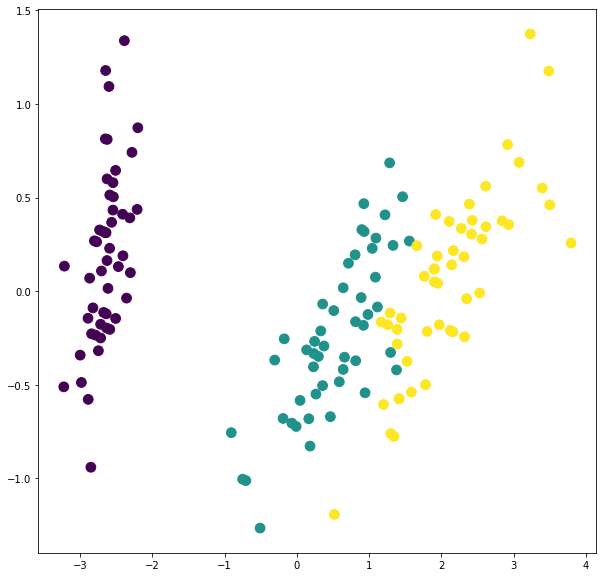

In [135]:
# Importáljuk be a pyplotot a matplotlib-ből plt néven!
from matplotlib import pyplot as plt
# Kezdjünk új ábrát a plt.figure segítségével!
plt.figure(figsize=(10,10))
# Készítsünk egy scatter plotot az a df_pca2 első és második dimenziójából,
# ahol az adatok színét (c) az y adja meg.
print(out["C1"])
plt.scatter(out["C1"],out["C2"],s=95,c=y,)
# A horizontális címke legyen 'PCA 1' (plt.xlabel).
plt.xlabel="asfa"
# A vertikális címke legyen 'PCA 2' (plt.ylabel).
...
# Az ábra címe legyen 'Az Írisz dataset PCA projekciója'.
...
# Jelenítsük meg az ábrát a plt.show segítségével!
plt.show()

### --> Feladat 3 vége

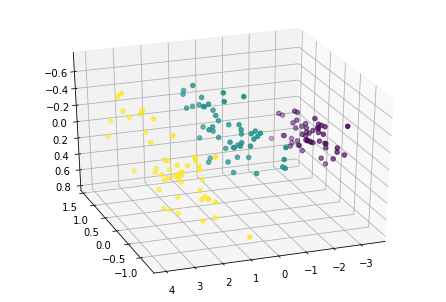

In [136]:
# PCA 3 dimenzióban

from mpl_toolkits.mplot3d.axes3d import Axes3D

tr_pca3 = PCA(n_components=3)
df_pca3 = tr_pca3.fit_transform(df)

fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df_pca3[:, 0], df_pca3[:, 1], df_pca3[:, 2], c=y)

plt.show()

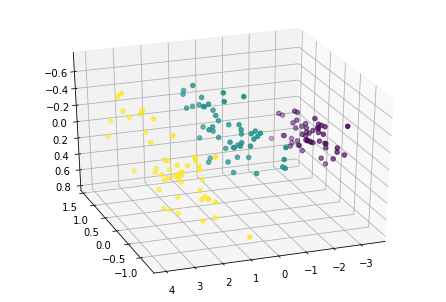

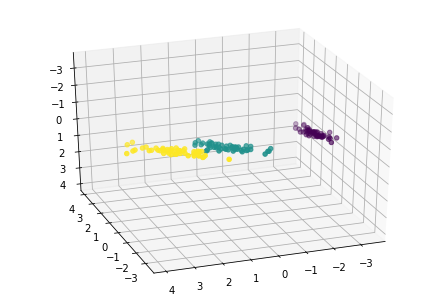

In [137]:
# 3D és 2D projekció összehasonlítása

tr_pca2 = PCA(n_components=2)
df_pca2 = tr_pca2.fit_transform(df)
df_pca2_recon = tr_pca2.inverse_transform(df_pca2)

tr_pca3 = PCA(n_components=3)
df_pca3 = tr_pca3.fit_transform(df)
df_pca3_2 = tr_pca3.fit_transform(df_pca2_recon)

fig = plt.figure(1)
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df_pca3[:, 0], df_pca3[:, 1], df_pca3[:, 2], c=y)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_xlim()
zmin, zmax = ax.get_xlim()

fig = plt.figure(2)
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(zmin,zmax)
ax.scatter(df_pca3_2[:, 0], df_pca3_2[:, 1], df_pca3_2[:, 2], c=y)

plt.show()

### Csökkenő variancia

A PCA definíciója alapján a dimenziók szerint csökken a variancia.

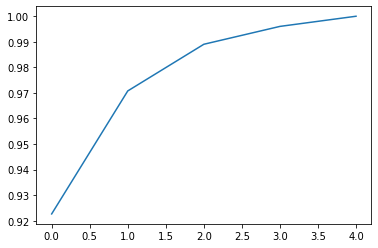

In [138]:
tr_pca = PCA()
tr_pca.fit(df)
plt.plot(np.cumsum(tr_pca.explained_variance_ratio_))
#plt.xlabel('PCA komponensek száma')
#plt.ylabel('Kumulált variancia');
plt.show()

## Veszteséges tömörítés

Encoding: A PCA egy transzformációt definiál az eredeti térből a "PCA" térbe.

Decoding: Az ellentétes irányú transzformáció is elvégezhető, ezt hívjuk rekonstrukciónak / inverz transzformációnak.
* Erre láttunk is példát (PCA.inverse_transform)

A PCA ortogonális irányokat ad meg
* Ez matematikailag azt jelenti, hogy képes reprezentálni az eredeti teret
* Ha az összes PCA dimenziót használom reprezentációra, akkor vissza tudom állítani az eredeti adatokat.

Mit tudok tenni abban az esetben, ha
* Túl sok dimenzióm van
* Azt gondolom, hogy a dimenziók valamilyen szempontból nézve "redundánsak"
* Szeretném kevesebb byte-tal leírni az adataimat

Egy lehetséges tömörítési módszer
* Az adatokat a PCA bázis egy kiválasztott alterében ábrázolom.
* Azaz nem használom a teljes bázist, csak annak egy részhalmazát.
* Praktikus az elsők közül választani, mivel ott van a nagy variancia.

Információt veszítek.
* Hogy definiáljam azt, hogy melyik információ veszhet el?
* Mi az, ami nem annyira fontos a számomra?
* Mi lenne, ha eldobnám az alacsony varianciájú dimenziókat?

## Digits dataset

In [139]:
# Digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [140]:
print(digits["data"][13].reshape(8,8))
print(digits.DESCR)

[[ 0.  2.  9. 15. 14.  9.  3.  0.]
 [ 0.  4. 13.  8.  9. 16.  8.  0.]
 [ 0.  0.  0.  6. 14. 15.  3.  0.]
 [ 0.  0.  0. 11. 14.  2.  0.  0.]
 [ 0.  0.  0.  2. 15. 11.  0.  0.]
 [ 0.  0.  0.  0.  2. 15.  4.  0.]
 [ 0.  1.  5.  6. 13. 16.  6.  0.]
 [ 0.  2. 12. 12. 13. 11.  0.  0.]]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to

In [141]:

digits.data.shape

(1797, 64)

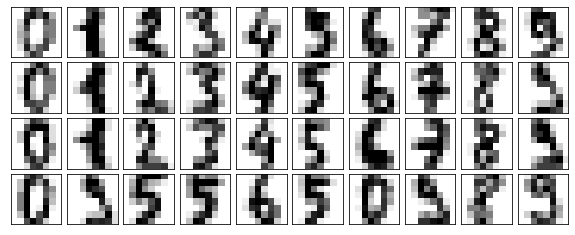

In [142]:
from matplotlib import pyplot as plt
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
    plt.show()
    
df = digits.data
plot_digits(df)

### --> Feladat 4: Az IRIS dataseten tanultak alapján jelenítsuk meg a digit datasetet PCA segítségével, 2 dimenzióban

In [143]:
#print(digits)
...
...
digits.data.reshape([14376,8])

type(digits)

sklearn.utils.Bunch

In [144]:
# Segítség:
# edgecolor='none',
# alpha=0.5,
# cmap=plt.cm.get_cmap('nipy_spectral', 10)
df2=pd.DataFrame(data= np.c_[digits['data'], digits['target']])
print(df2)
...
...
d=describe(df2)
print("mean")
print(d.mean)
print(d)
print_stats(df2)

       0    1     2     3     4     5   ...    59    60    61   62   63   64
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  13.0  10.0   0.0  0.0  0.0  0.0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  11.0  16.0  10.0  0.0  0.0  1.0
2     0.0  0.0   0.0   4.0  15.0  12.0  ...   3.0  11.0  16.0  9.0  0.0  2.0
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  13.0  13.0   9.0  0.0  0.0  3.0
4     0.0  0.0   0.0   1.0  11.0   0.0  ...   2.0  16.0   4.0  0.0  0.0  4.0
...   ...  ...   ...   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...
1792  0.0  0.0   4.0  10.0  13.0   6.0  ...  14.0  15.0   9.0  0.0  0.0  9.0
1793  0.0  0.0   6.0  16.0  13.0  11.0  ...  16.0  14.0   6.0  0.0  0.0  0.0
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...   9.0  13.0   6.0  0.0  0.0  8.0
1795  0.0  0.0   2.0  10.0   7.0   0.0  ...  12.0  16.0  12.0  0.0  0.0  9.0
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  12.0  14.0  12.0  1.0  0.0  8.0

[1797 rows x 65 columns]
mean
[0.00000000e+00 3.03839733e-01 5.20478575e+00

In [145]:
df_feature=df2[df2.columns[0:64]]
df_feature.head
m=mean(df_feature)
print(m)

dfc=df_feature-m
print_stats(dfc)

0      0.000000
1      0.303840
2      5.204786
3     11.835838
4     11.848080
        ...    
59    12.089037
60    11.809126
61     6.764051
62     2.067891
63     0.364496
Length: 64, dtype: float64
Observations: 1797
Min: [ 0.00000000e+00 -3.03839733e-01 -5.20478575e+00 -1.18358375e+01
 -1.18480801e+01 -5.78185865e+00 -1.36227045e+00 -1.29660545e-01
 -5.56483027e-03 -1.99387869e+00 -1.03823038e+01 -1.19794101e+01
 -1.02793545e+01 -8.17584864e+00 -1.84641068e+00 -1.07957707e-01
 -2.78241514e-03 -2.60155815e+00 -9.90317195e+00 -6.99276572e+00
 -7.09794101e+00 -7.80634391e+00 -1.78853645e+00 -5.00834725e-02
 -1.11296605e-03 -2.46967168e+00 -9.09126322e+00 -8.82136895e+00
 -9.92710072e+00 -7.55147468e+00 -2.31775181e+00 -2.22593211e-03
  0.00000000e+00 -2.33945465e+00 -7.66722315e+00 -9.07178631e+00
 -1.03016138e+01 -8.74401781e+00 -2.90929327e+00  0.00000000e+00
 -8.90372844e-03 -1.58375070e+00 -6.88146912e+00 -7.22815804e+00
 -7.67223150e+00 -8.23650529e+00 -3.45631608e+00 -2.726766

In [146]:
tr_pca=PCA(dfc)
tr_pca

PCA(copy=True, iterated_power='auto',
    n_components=       0        1         2          3   ...        60        61        62        63
0     0.0 -0.30384 -0.204786   1.164162  ... -1.809126 -6.764051 -2.067891 -0.364496
1     0.0 -0.30384 -5.204786   0.164162  ...  4.190874  3.235949 -2.067891 -0.364496
2     0.0 -0.30384 -5.204786  -7.835838  ... -0.809126  9.235949  6.932109 -0.364496
3     0.0 -0.30384  1.795214   3.164162  ...  1.190874  2.235949 -2.067891 -0.364496
4     0.0 -0.30384 -5.20478...
1793  0.0 -0.30384  0.795214   4.164162  ...  2.190874 -0.764051 -2.067891 -0.364496
1794  0.0 -0.30384 -4.204786  -0.835838  ...  1.190874 -0.764051 -2.067891 -0.364496
1795  0.0 -0.30384 -3.204786  -1.835838  ...  4.190874  5.235949 -2.067891 -0.364496
1796  0.0 -0.30384  4.795214   2.164162  ...  2.190874  5.235949 -1.067891 -0.364496

[1797 rows x 64 columns],
    random_state=None, svd_solver='auto', tol=0.0, whiten=False)

Nem szeparál jól, de nem is arra való.

In [147]:
# Hozzuk létre 2 dimenziós PCA modellt (n_components) egy tr_pca2 változóba!
tr_pca2=PCA(n_components=2)
# Tanítsuk be modellt a df_features adatokon, a transzformált adatokat helyezzük a df_pca2 változóba!
df_pca2=tr_pca2.fit_transform(df_feature)
# Írassuk ki a df_pca2 méretét a DataFrame.shape segítségével!
out=pd.DataFrame(data=df_pca2,columns = ['C1', 'C2'])
print(out)


             C1         C2
0     -1.259466  21.274878
1      7.957607 -20.768643
2      6.991924  -9.955998
3    -15.906108   3.332517
4     23.306867   4.269032
...         ...        ...
1792 -14.606631  13.344151
1793   6.464572  20.567319
1794  10.801287  -6.960305
1795  -4.872103  12.423949
1796  -0.344383   6.365459

[1797 rows x 2 columns]


In [148]:
y=digits["target"]
# Írassuk ki y-t!
print(y)


[0 1 2 ... 8 9 8]


No handles with labels found to put in legend.


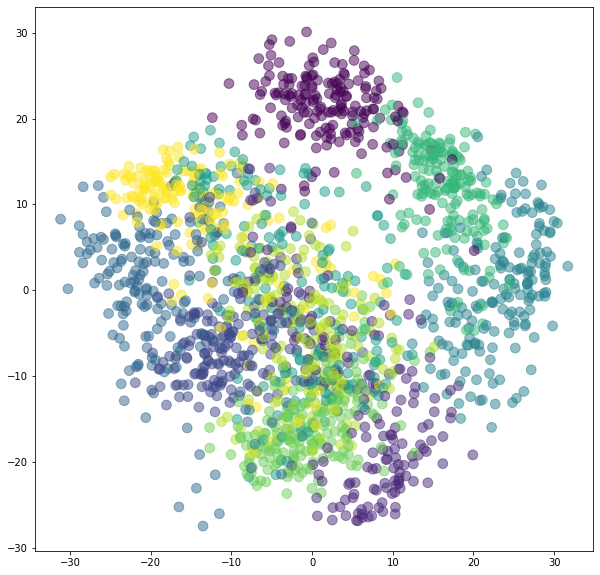

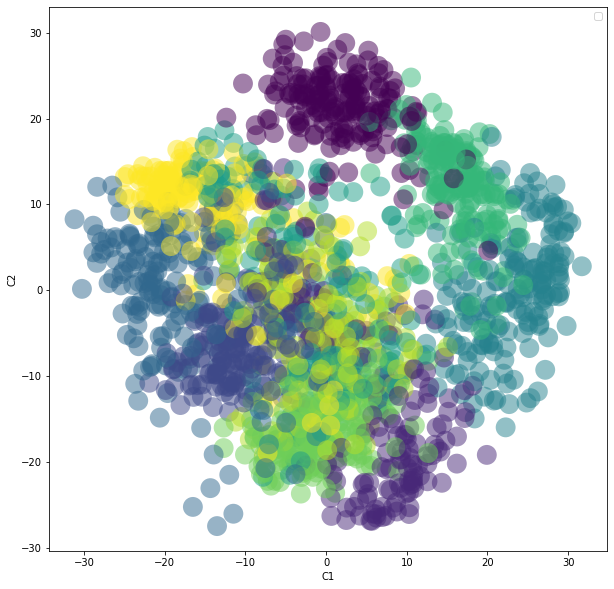

In [149]:
# Importáljuk be a pyplotot a matplotlib-ből plt néven!
from matplotlib import pyplot as plt
# Kezdjünk új ábrát a plt.figure segítségével!
plt.figure(figsize=(10,10))
# Készítsünk egy scatter plotot az a df_pca2 első és második dimenziójából,
# ahol az adatok színét (c) az y adja meg.
#print(out["C1"])
plt.scatter(out["C1"],out["C2"],s=95,c=y,alpha=0.5)
# A horizontális címke legyen 'PCA 1' (plt.xlabel).

# A vertikális címke legyen 'PCA 2' (plt.ylabel).
...
# Az ábra címe legyen 'Az Írisz dataset PCA projekciója'.
...
# Jelenítsük meg az ábrát a plt.show segítségével!


#plt.show()



fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)



ax.scatter(out["C1"],out["C2"],s=395 , c=y, marker='o', edgecolor='none', alpha=0.5)

ax.set_xlabel('C1')
ax.set_ylabel('C2')

#ax.contourf(out["C1"],out["C2"],y)
ax.legend()

fig.show()

#Színek jelentése

[0 1 2 ... 8 9 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


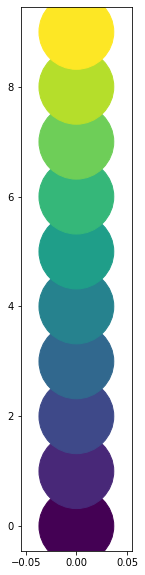

In [150]:
plt.figure(figsize=(2,10))


print(y)
colord=sorted(list(set(y)))
print(colord)

plt.scatter([0,0,0,0,0,0,0,0,0,0],colord,s=5595,c=colord)
# 
plt.xlabel="asfa"

#Hogy néz ki ez 3 dimenzióban?

             C1         C2         C3
0     -1.259465  21.274884  -9.463053
1      7.957613 -20.768698   4.439508
2      6.991921  -9.955988   2.958556
3    -15.906103   3.332466   9.824374
4     23.306866   4.269059  -5.675129
...         ...        ...        ...
1792 -14.606628  13.344124 -13.439046
1793   6.464572  20.567298  -9.155114
1794  10.801283  -6.960253   5.599555
1795  -4.872100  12.423952 -10.170867
1796  -0.344392   6.365548  10.773706

[1797 rows x 3 columns]
[0 1 2 ... 8 9 8]


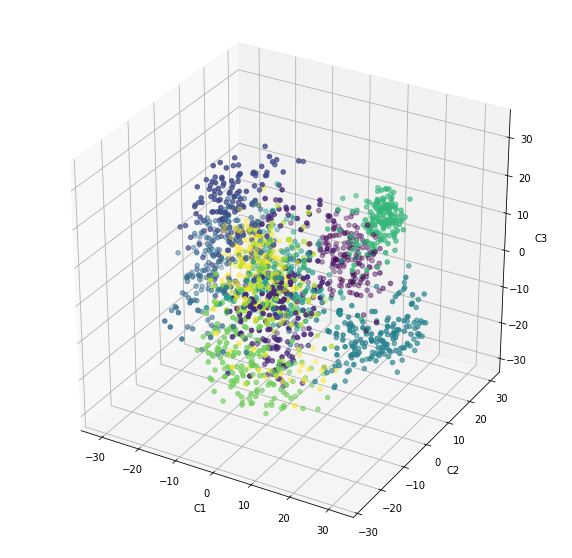

In [151]:
# Hozzuk létre 3 dimenziós PCA modellt (n_components) egy tr_pca2 változóba!
tr_pca3=PCA(n_components=3)
# Tanítsuk be modellt a df_features adatokon, a transzformált adatokat helyezzük a df_pca2 változóba!
df_pca3=tr_pca3.fit_transform(df_feature)
# Írassuk ki a df_pca2 méretét a DataFrame.shape segítségével!
out=pd.DataFrame(data=df_pca3,columns = ['C1', 'C2',"C3"])
print(out)



# Importáljuk be a pyplotot a matplotlib-ből plt néven!
from matplotlib import pyplot as plt


y=digits["target"]
# Írassuk ki y-t!
print(y)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')





ax.scatter(out["C1"],out["C2"],out["C3"] , c=y, marker='o')

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')

plt.show()

### --> Feladat 4 vége

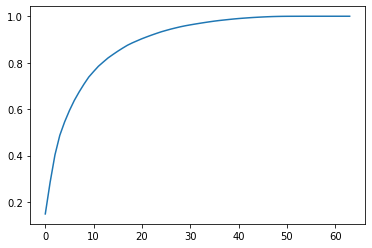

In [152]:
tr_pca = PCA().fit(df)
plt.plot(np.cumsum(tr_pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance');
plt.show()

### -> Feladat 5: Tömörítés, zajszűrés a PCA segítségével

Négy különböző encode-decode párost fogunk összehasonlítani:
 - PCA bázis létrehozása, ami a variancia 90%-át reprezentálja
 - 50%-os variancia
 - Zaj hozzáadása az eredeti mintához, majd encode-decode a 90%-ossal
 - Zajos minta encode-decode az 50%-ossal

In [153]:
# Hozzunk létre egy PCA objektumot, ami a variancia 90%-át tartja meg!
# A változó neve legyen: tr_pca_p90.
# Dokumentáció: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
tr_pca_p90=PCA(0.9)
# Tanítsuk be az adatokon a fit metódus segítségével!
tr_pca_p90.fit(df_feature)
# Írassuk ki a komponensek számát (n_components_)!
tr_pca_p90.n_components_

21

In [170]:
# Analóg módon hozzunk létre egy PCA objektumot, 50%-os varianciával!
# A változó neve legyen tr_pca_p50.
tr_pca_p90=PCA(0.5)
# Tanítsuk be az adatokon a fit metódus segítségével!
tr_pca_p90.fit(df_feature)
# Írassuk ki a komponensek számát (n_components_)!
tr_pca_p90.n_components_

5

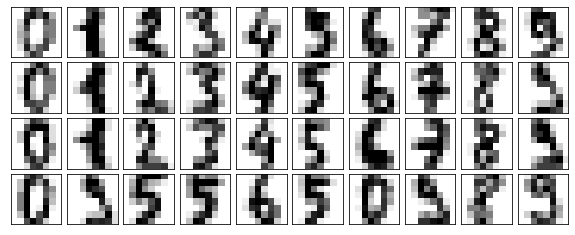

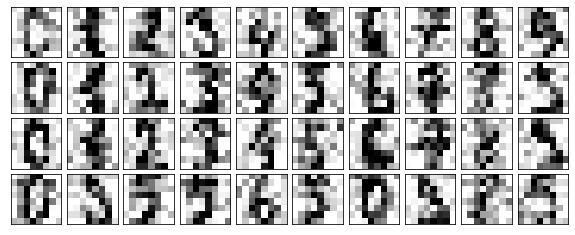

In [169]:
# Zaj hozzáadása a mintához
np.random.seed(42)
df_noisy = np.random.normal(df, 4)
plot_digits(df)
plot_digits(df_noisy)

<class 'numpy.ndarray'>


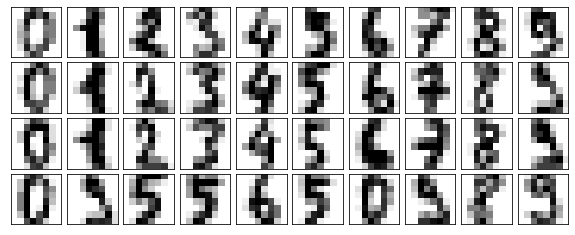

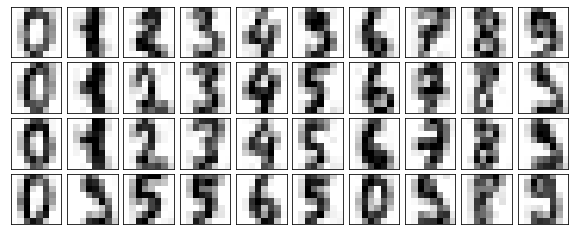

In [177]:
# Encode, majd decode
# Lássuk, hogy mennyire változott-e a minta, olvashatók-e még a számjegyek?
# Transzformáljuk a eredeti mintát a 90%-os PCA-val! (transform)
tr_pca_p90=PCA(0.9)
tr_pca_p90.fit(df_feature)
df2=tr_pca_p90.transform(df_feature)

print(type(df2))
# Rekonstruáljuk az encode-olt mintát! (inverse_transform)
df_decoded=tr_pca_p90.inverse_transform(df2)
# Írassuk ki a rekonstruált számjegyeket!
plot_digits(df)
plot_digits(df_decoded)

<class 'numpy.ndarray'>


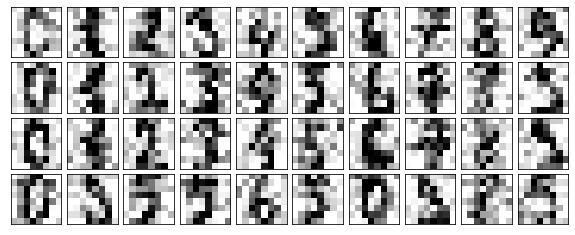

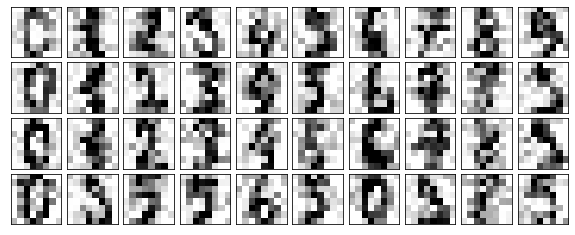

In [176]:
# Tegyük ugyanezt, csak a zajos mintával!
tr_pca_p90=PCA(0.9)
tr_pca_p90.fit(df_noisy)
df2=tr_pca_p90.transform(df_noisy)

print(type(df2))
# Rekonstruáljuk az encode-olt mintát! (inverse_transform)
df_decoded=tr_pca_p90.inverse_transform(df2)
# Írassuk ki a rekonstruált számjegyeket!
plot_digits(df_noisy)
plot_digits(df_decoded)


<class 'numpy.ndarray'>


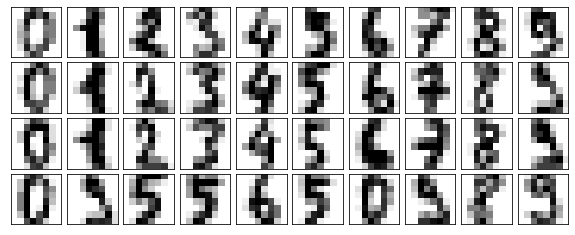

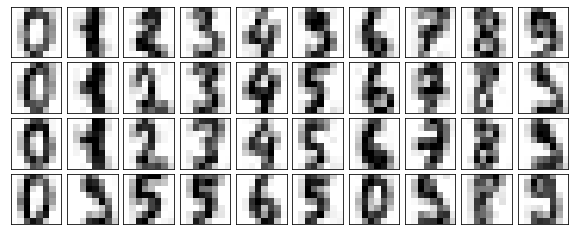

In [185]:
# Nézzük meg, hogy mi történik a mintával egy 50%-os encode-decode esetén!
tr_pca_p50=PCA(0.9)
tr_pca_p50.fit(df_feature)
df2=tr_pca_p50.transform(df_feature)

print(type(df2))
# Rekonstruáljuk az encode-olt mintát! (inverse_transform)
df_decoded=tr_pca_p50.inverse_transform(df2)
# Írassuk ki a rekonstruált számjegyeket!
plot_digits(df)
plot_digits(df_decoded)

<class 'numpy.ndarray'>


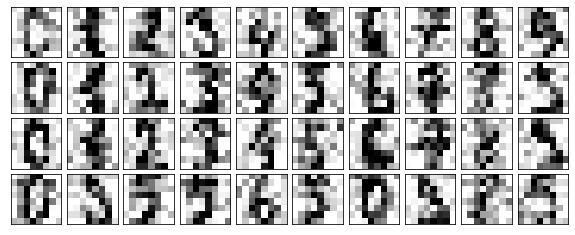

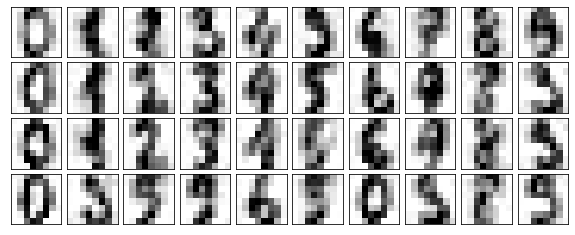

In [182]:
# Nézzük meg, hogy mi történik a zajos mintával egy 50%-os encode-decode esetén!
tr_pca_p50=PCA(0.5)
tr_pca_p50.fit(df_noisy)
df2=tr_pca_p50.transform(df_noisy)

print(type(df2))
# Rekonstruáljuk az encode-olt mintát! (inverse_transform)
df_decoded=tr_pca_p50.inverse_transform(df2)
# Írassuk ki a rekonstruált számjegyeket!
plot_digits(df_noisy)
plot_digits(df_decoded)

### --> Feladat 5 vége

# Faktor analízis

A PCA "továbbfejlesztése"
A PCA egyik problémája az, hogy absztrakt, azaz nem interpretálható, bázisokat hoz létre,
* ezért a szociológia, közgazdaságtan nem annyira kedveli.
* A FA azt ígéri, hogy olyan bázisokat hoz létre, amelyekhez valamilyen szemantikát lehet rendelni.

A FA a "bázist" latent factornak (rejtett tényezőnek) hívja. A latent factor fontos kifejezés a reprezentáció tanulásban.

A modell tulajdonságai
* A model: $x-\mu=LF-\epsilon$ - Itt a hibatag bevezetése a fontos, a PCA teljesen vissza tudja állítani a mintát.
* A faktorok és a hiba függetlenek egymástól ($\mathbb{E}(F\epsilon)=\mathbb{E}(L)\mathbb{E}(\epsilon)$)
* A faktorok centráltak ($\mathbb{E}(F)=0$)
* A faktorok nem korrelálnak ($Cov(F)=I$) - Azaz nem merőlegesek, egy másik szemlélet.
* A variancia dimenzióként változhat ($Var(\epsilon_i)=\psi_i$)

![alt text](https://drive.google.com/uc?export=view&id=134DkXI94YuOEm8_sbqi4-BI3QiWrrJA4)

# LDA

Rövidítés: Linear discriminant analysis

PCA - unsupervised, azaz nincs plusz információ a mintáról

LDA - supervised, címkék is vannak a mintáról

A cél, hogy lineárisan minél jobban szeparáljuk az adatokat
* Maximális távolság a projektált osztályok átlagai között
* Minimális variancia a projektált osztályokban

![alt text](https://drive.google.com/uc?export=view&id=141cFMVnoPTvxONe1K5_uQBjXccte2wWo)

## Megfelelő irányú projekció keresése

Irány megtalálása, közben a döntési pont vizsgálata.

![alt text](https://drive.google.com/uc?export=view&id=10Mv2Xe59wXmUK4AoArhG3i95LDE6Gm0I)

## Eltérő eloszlások

A két eloszlás "metszési pontjánál" található a döntési felület.

![alt text](https://drive.google.com/uc?export=view&id=10gC0LWyOfAiUzBfBiM02L3IQx4Tb9aZ7)

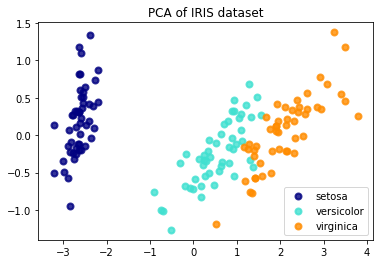

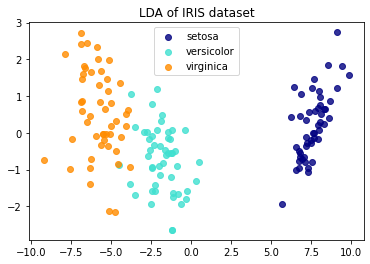

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure(1)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure(2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# NMF
Non-negative matrix factorization

Szintén faktorizációs technika.

Matematikai háttér
* $V=WH$, ahol a mátrixok minden eleme pozitív
* A hibafüggvény, amit minimalizálni szeretnénk: $||V-WH||^2_F$
* Iteratív (nem explicit) megoldása van
* Tipikus eljárások: gradient descent, stochastic gradient descent
* Megakadhat lokális minimumban
* A megoldás nem egyedi (több lokális minimum). Lásd: $WH=WBB^{-1}H$

## Lokális optimalizáció

A legtöbb, machine learning területen előforduló eljárás iteratív megoldást ajánl.
* A PCA egy matematikai eszköz.
* A játék itt abból áll, hogy azt, amit el szeretnénk érni, megpróbáljuk matematikai formulákkal megfogalmazni. Például:
 * legyen minden komponens pozitív,
 * legyen minél kisebb a rekonstrukciós hiba
* Matematikusi szemmel nézve a nehézség az, hogy úgy legyen megfogalmazva a probléma, hogy le lehessen vezetni a megoldást.
* A machine learning szakít ezzel.
 * Itt inkább az a fontos, hogy konvergáljon az optimumkeresés.
 * Illetve kis hibát adjon.
 
 Bevezetésként (ezek a módszerek lesznek majd, részletesebben)
 * Gradient descent - Mindig a legmeredekebb irányba megyünk
 * SG - Véletlenszerűen választunk irányt és javítjuk a hibát.
 * Mekkorát lépjünk? Esetleg lépjünk egyre kisebbet? (Simulated annealing)
 * Mikor álljunk meg?
  * Ha már nem meredek?
  * Ha már nincs idő / lépésszám?
  * Ha már elfogyott a lendület? 

![Hibafelület](https://drive.google.com/uc?export=view&id=1Hb0eddRzWskSJYStF46PufJ9rWZ6Ghyl)
forrás: https://www.jeremyjordan.me/gradient-descent/

## NMF ANN háttér

Neurális hálózatok által inspirált módszer

Az NMF egy belső / rejtett reprezentációt alakít ki. (ANN terminológia)

![alt text](https://drive.google.com/uc?export=view&id=1ezIEehYX3Xi7SSKkhUVHgi8ycCX4TZY3)

## NMF vs PCA

Míg a PCA irányokat keres, addig az NMF komponenseket.

![alt text](https://drive.google.com/uc?export=view&id=1NYsh5WczVkdPdnR8HHuQ04kfTf-bj4M9)
![alt text](https://drive.google.com/uc?export=view&id=1MavO2hlyCbaPT-KSlj4og3GmMXIKRy9c)


# Ritka módszerek

* Egy vektor ritka, ha kevés nem nulla értéket tartalmaz.
  * k-sparse - legfeljebb k darab nem nulla értéket tartalmaz
* Reprezentáció tanulás esetén a probléma
  * $V=WH,$
  * $h_i \in H,$ $h_i$ ritka
  * $V$ - az eredeti minta
  * $W$ a koordináták az új reprezentációban
  * $H$ a bázis
* Ez azt jelenti, hogy egy vektor $k$ darab bázis kombinációjaként tudunk előállítani.
  * Ez elviszi a feladatot kombinatorikai irányba - Konkrétan mely dolgok kombinációja legyen a reprezentáció?

In [ ]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Loading dataset...
done in 14.191s.
Extracting tf-idf features for NMF...
done in 0.328s.
Fitting the NMF model with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.356s.

Topics in NMF model:
Topic #0:
just people don think like know time good make way really say right ve want did ll new use years
Topic #1:
windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2:
god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3:
thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4:
car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5:
edu soon com send university internet mit ftp mail cc pub article information hope program mac email home contact blood
Topic #6:
f

* Neurobiológiai motiváció
  * Az emlősök idegrendszere több milliárd neuront tartalmaz
  * Az információ reprezentációja minta (pattern) alapú - ezt neural code-nak hívják
  * A neural code definiálja a reprezentált elemet
  * A sűrű (dense) reprezentációs képessége jóval magasabb, mint amennyi információt reprezentálni szükséges
  * Egyfajta takarékosság, ne kelljen mindig minden idegsejtnek működnie.
  * Több info: http://www.scholarpedia.org/article/Sparse_coding
* Példa:
  * Málna: 1 x piros + 1 x puha
  * Alma: 1 x piros + 1 x kemény
  * Banán: 1 x sárga + 1 x puha
  * Rossz alma: 1 x barna + 1 x puha
* Hol hasznos ez?
  * Ha nem változik körülöttünk a világ, amelyet reprezentálnunk kell, akkor ki tudunk fejleszteni egy optimális reprezentációs eljárást.
  * Tegyük fel, hogy bejön egy új adat, egy új fogalom.
  * Ilyenkor sűrű reprezentáció esetén: bázis újratanulás, majd az összes reprezentáció újraszámítása.
  * Sparse reprezentáció esetén nem kell újratanulni az egész reprezentációt, hanem csak az új dolgot kell megtanulni reprezentálni.
  * Ritka reprezentáció esetén
    * Ha tudunk reprezentálni, akkor csak az új koordinátákat kell kiszámolni.
    * Esetleg hozzá kell tenni egy új latent factort, egyfajta megkülönböztető feature-t. Azaz esetleg lehet új bázisra szükség.
    * Ha valamelyik bázis változik (optimalizáció), akkor csak az érintetteket kell újraszámolni.

## Matematikai megfogalmazás

Két dolgot szeretnénk egyszerre: kis hibát és ritka reprezentációt

Megoldás: a hibatag kiegészítése, például lasso, ridge.

Több info: https://en.wikipedia.org/wiki/Lasso_(statistics)

### Példa 1: Ritka PCA, itt a hibafüggvénybe kerül bele egy új megszorítás.

![alt text](https://drive.google.com/uc?export=view&id=1CIWFcy5O2S7wbpuZ2-ooWcdIHNawWDBV)

Fontos: 1-es norma.

### Példa 2: Ritka NMF, hibafüggvénnyel

![alt text](https://drive.google.com/uc?export=view&id=1KjhpnZ2-GW-RuTOGQZeEXMWoR77PBDsy)

https://en.wikipedia.org/wiki/Norm_(mathematics)

## 1-es norma

![alt text](https://drive.google.com/uc?export=view&id=1OG79nFG1JJATSftXAXrIDOKIE6jy-U1h)

Forrás: https://gerardnico.com/data_mining/lasso


# Restricted Boltzmann Machine

* 1986-ban vezették be
* Restricted - két réteg van: hidden és visible
* Generatív sztochasztikus ANN
   * Hidden units - terminológia
   * Joint probability eloszlást definiál a hidden és a visible units között. (szép mondat :)
   * A stochasztikusság jól jöhet zaj esetén.
* Optimalizáció
   * Egy energiafüggvényt definiál, ami gyakran előfordul ANN területen
   * $E(v,h) = -\sum_i a_i v_i - \sum_j b_j h_j -\sum_i \sum_j v_i w_{i,j} h_j$
  * A megoldás az energiafüggvény optimalizációja alapján áll elő
* Kapcsolat: [Markov random field](https://https://en.wikipedia.org/wiki/Markov_random_field)

![alt text](https://drive.google.com/uc?export=view&id=1VysYOMZT5zyvAygA9v3O2QbHJLiAQq7s)

Kép forrása, illetve több info: https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine

# Hebbian learning

* Unsupervised, azaz címkézetlen adatokon dolgozik.
* Egyfajta asszocitatív memória
* Azokat a kapcsolatokat erősíti, amelyek időben együtt tüzelnek (fire together -> wire together)

https://en.wikipedia.org/wiki/Hebbian_theory

# Encoder - decoder terminológia

* $L(x-g_\Theta(f_\Theta(x)))$
 * $L$ hibafüggvény
 * $f_\Theta$ kódoló (encoder)
 * $g_\Theta$ dekódoló (decoder)
* Lineáris eset:
 * $f_\Theta(x)=b+Wx$
 * $g_\Theta(x)= d + W'h$
* PCA: L = MSE (mean squared error) és W ortogonális
* Példa:
 * de-noising autoencoder - várható értéket a hibafüggvényben
 * contractive autoencoder - [Jacobian](https://https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) a hibafüggvényben
 * Sparse autoencoder - egyes norma a hibatagban

![Deep Learning](https://i1.wp.com/www.michaelchimenti.com/wp-content/uploads/2017/11/Deep-Neural-Network-What-is-Deep-Learning-Edureka.png?ssl=1)
forrás: https://cdn.edureka.co/blog/wp-content/uploads/2017/05/Deep-Neural-Network-What-is-Deep-Learning-Edureka.png

# Alapelvek

* Smooth - $x~y$, implies that $f(x)~f(y)
* Multiple explanatory factors - The data has to be generated by several underlying factors. Not one.
* Disentangling factors - Somehow independent, not necessarily orthogonal.
* Sparsity - Only a few explanatory factors for each observation.
* Hierarchical organization of the explanatory factors - More and less abstract concepts, deep learning.
* Simplicity - In good, high level representations the factors are related to each other through simple (in most cases linear) dependencies.
* Coherence - Spatially nearby observations should be associated with the same value of categorical concepts.
* Manifolds - Different values of categorical variables are associated with separate manifolds.

Forrás: Representation Learning: A Review and New Perspectives by Bengio et al.

Link: https://arxiv.org/abs/1206.5538

# Könyvajánló

Simon O. Haykin - Neural Networks and Learning Machines

http://dai.fmph.uniba.sk/courses/NN/haykin.neural-networks.3ed.2009.pdf